In [ ]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# prompt: read a pickle file from drive

import pickle

with open('/content/drive/MyDrive/Colab Notebooks/ROIxTimeseries/psi_data.pkl', 'rb') as f:
  data = pickle.load(f)

print(data)


        subject                                         psi_matrix  adhd  \
0      subject1  [[1.0, 0.8016814987579317, 0.839641852247262, ...     0   
1      subject2  [[1.0, 0.9101210641534417, 0.576123749895304, ...     0   
2      subject3  [[1.0, 0.7530150385517623, 0.5067414702685676,...     0   
3      subject4  [[1.0, 0.817812140965262, 0.520061068095793, 0...     0   
4      subject5  [[1.0, 0.7477157295145737, 0.8259250654415865,...     0   
..          ...                                                ...   ...   
160  subject161  [[1.0, 0.8966881181531998, 0.7033025053563576,...     0   
161  subject162  [[1.0, 0.4594896330132013, 0.08037697590578775...     0   
162  subject163  [[1.0, 0.9030386042889056, 0.7605824095393477,...     0   
163  subject164  [[1.0, 0.8822326646328201, 0.6885390808656763,...     0   
164  subject165  [[1.0, 0.9726522672232811, 0.8350244047495731,...     0   

     autism  healthy  
0         1        0  
1         1        0  
2         1       

In [ ]:
1, 33, 59, 64, 80

(1, 33, 59, 64, 80)

In [ ]:
sub1_mat = data.iloc[22]

# Extract the matrix from the attribute of the first row
first_matrix = sub1_mat['psi_matrix']

In [ ]:
first_matrix

array([[1.        , 0.58012764, 0.41189458, ..., 0.54368886, 0.42686091,
        0.37272521],
       [0.58012764, 1.        , 0.47460952, ..., 0.6071523 , 0.44461375,
        0.39000215],
       [0.41189458, 0.47460952, 1.        , ..., 0.52872661, 0.46143163,
        0.48759897],
       ...,
       [0.54368886, 0.6071523 , 0.52872661, ..., 1.        , 0.55440564,
        0.4164274 ],
       [0.42686091, 0.44461375, 0.46143163, ..., 0.55440564, 1.        ,
        0.54357735],
       [0.37272521, 0.39000215, 0.48759897, ..., 0.4164274 , 0.54357735,
        1.        ]])

In [ ]:
first_matrix.shape

(132, 132)

In [ ]:
import numpy as np

# Assuming your matrix is named 'matrix'
# Flatten the matrix into a 1D array
flat_matrix = first_matrix.flatten()

# Create a histogram of the values in the array
hist, bins = np.histogram(flat_matrix, bins=10)  # Adjust the number of bins as needed

# Find the bin with the highest count
max_count_index = np.argmax(hist)

# Determine the corresponding value (bin edge) as the threshold
threshold_value = bins[max_count_index + 1]

print("Threshold value:", threshold_value)

Threshold value: 0.4002732818095185


In [ ]:
total_data_points = np.sum(hist)
print("Total number of data points from histogram:", total_data_points)

Total number of data points from histogram: 17424


In [ ]:
import numpy as np

# Assuming your matrix is named 'first_matrix'
# Flatten the matrix into a 1D array
flat_matrix = first_matrix.flatten()

# Create a histogram of the values in the array
hist, bins = np.histogram(flat_matrix, bins=10)  # Adjust the number of bins as needed

# Calculate cumulative distribution
cumulative_dist = np.cumsum(hist)

# Convert to probability (normalize)
cumulative_prob = cumulative_dist / cumulative_dist[-1]

# Find the bin with the highest count
max_count_index = np.argmax(hist)
threshold_value = bins[max_count_index + 1]

# Print results
print("Threshold value:", threshold_value)
print("\nBin edges and cumulative probabilities:")
for i in range(len(cumulative_prob)):
    print(f"Bin edge: {bins[i]:.2f}, Cumulative probability: {cumulative_prob[i]:.3f}")

Threshold value: 0.4002732818095185

Bin edges and cumulative probabilities:
Bin edge: 0.00, Cumulative probability: 0.034
Bin edge: 0.10, Cumulative probability: 0.104
Bin edge: 0.20, Cumulative probability: 0.255
Bin edge: 0.30, Cumulative probability: 0.504
Bin edge: 0.40, Cumulative probability: 0.747
Bin edge: 0.50, Cumulative probability: 0.906
Bin edge: 0.60, Cumulative probability: 0.975
Bin edge: 0.70, Cumulative probability: 0.990
Bin edge: 0.80, Cumulative probability: 0.992
Bin edge: 0.90, Cumulative probability: 1.000


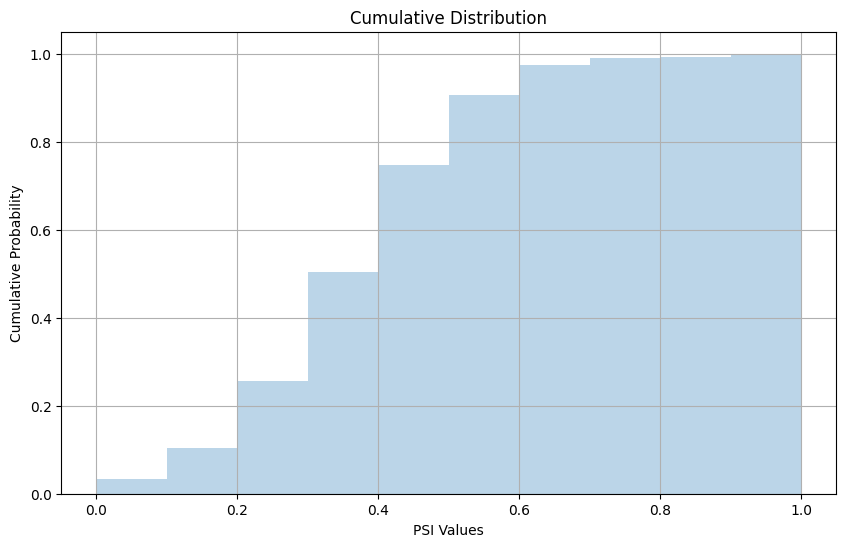

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.stairs(cumulative_prob, bins, fill=True, alpha=0.3)
plt.xlabel('PSI Values')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution')
plt.grid(True)
plt.show()

In [ ]:
thresh = 0.3

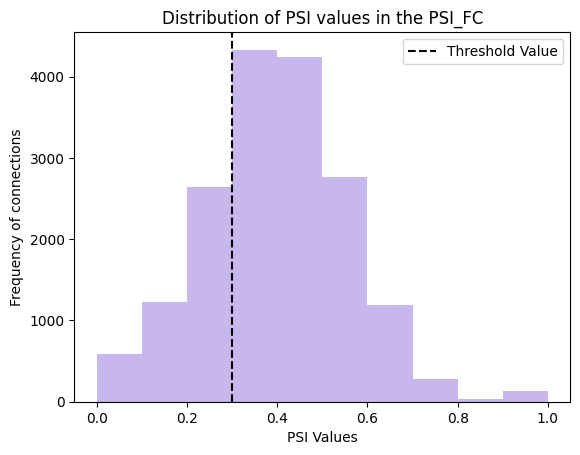

In [ ]:
import matplotlib.pyplot as plt

# Plot the histogram with bins
plt.hist(flat_matrix, bins=10, color='mediumpurple', alpha=0.5)
plt.axvline(x=thresh, color='black', linestyle='--', label='Threshold Value')
plt.xlabel('PSI Values')
plt.ylabel('Frequency of connections')
plt.title('Distribution of PSI values in the PSI_FC')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Iterate over each row in the DataFrame
for index, row in data.iterrows():
    # Extract the matrix from the attribute of the current row
    matrix = row['psi_matrix']

    # Flatten the matrix into a 1D array
    flat_matrix = matrix.flatten()

    # Create a histogram of the values in the array
    hist, bins = np.histogram(flat_matrix, bins=10)  # Adjust the number of bins as needed

    # Find the bin with the highest count
    max_count_index = np.argmax(hist)

    # Determine the corresponding value (bin edge) as the threshold
    threshold_value = bins[max_count_index + 1]

    print("Threshold value for row", index, ":", threshold_value)

    # Plot the histogram with bins
    plt.hist(flat_matrix, bins=10, color='blue', alpha=0.7)
    plt.axvline(x=threshold_value, color='red', linestyle='--', label='Threshold Value')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of Matrix Values (Row ' + str(index) + ')')
    plt.legend()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Iterate over each row in the DataFrame
for index, row in data.iterrows():
    # Extract the matrix from the attribute of the current row
    matrix = row['psi_matrix']

    # Flatten the matrix into a 1D array
    flat_matrix = matrix.flatten()

    # Create a histogram of the values in the array
    hist, bins = np.histogram(flat_matrix, bins=5)  # Adjust the number of bins as needed

    # Find the bin with the highest count
    max_count_index = np.argmax(hist)

    # Determine the corresponding value (bin edge) as the threshold
    threshold_value = bins[max_count_index + 1]

    print("Threshold value for row", index, ":", threshold_value)

Threshold value for row 0 : 0.8000018641591331
Threshold value for row 1 : 0.4000861370353462
Threshold value for row 2 : 0.6003925099376219
Threshold value for row 3 : 0.6000084423811087
Threshold value for row 4 : 0.6000113064956483
Threshold value for row 5 : 0.6626065367769027
Threshold value for row 6 : 0.6017595068007924
Threshold value for row 7 : 0.8000782984051545
Threshold value for row 8 : 0.8001184780444215
Threshold value for row 9 : 0.6000230671642663
Threshold value for row 10 : 0.6366773627832942
Threshold value for row 11 : 0.6019084895249042
Threshold value for row 12 : 0.40022716505611405
Threshold value for row 13 : 0.6004914141153999
Threshold value for row 14 : 0.6000900361272221
Threshold value for row 15 : 0.8000419223735857
Threshold value for row 16 : 0.6000472015066639
Threshold value for row 17 : 0.6264419202088054
Threshold value for row 18 : 0.6000336739592431
Threshold value for row 19 : 0.6000382292505135
Threshold value for row 20 : 0.8037581979429924
T